**Section 1 – Purpose and Objectives of the Project**

**A baseball fan is curious about the most effective strategy for teams won in different years, for example, if teams are more successful with high offenses, tight defenses or a balance of the two.**

**Here is the list we will do to predict it.**

**1. Import historical baseball team performance data, do some correlation analysis and find the independent variables that are good predictors of games won.** 

**2. Build a Game_Won model using these variables and Validate the model. We will set 95% Statistical significance of the overall model.**

**3. Predict the most effective strategy for teams won using the recent year's data**


**Section 2 – Data Exploration**

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection import train_test_split
import numpy as np

%matplotlib inline


In [2]:
df=pd.read_csv('baseball_teams.csv')

**Period 1 – before 1920**

**Section 2 – Data Exploration**

In [3]:
df_1920=df[df['Year']<1920]

In [4]:
df_1920.reset_index(drop=True, inplace=True)

In [5]:
df_1920.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,367,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,308,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,346,13,53,34,223,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,261,5,21,17,163,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,373,7,42,22,227,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN


In [6]:
df_1920.corr()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Attendance
Year,1.000000,-0.082193,0.802923,0.039266,0.602368,0.620393,0.170307,0.735271,0.655431,0.562873,...,0.676590,0.821519,0.664930,0.230242,0.679998,0.676153,-0.549536,0.785223,0.878291,0.391909
Final_Standing,-0.082193,1.000000,-0.108053,-0.091165,-0.635882,0.489376,-0.335152,-0.131851,-0.225380,-0.311365,...,-0.277237,-0.136902,0.121449,0.159822,0.095441,-0.242680,0.186997,0.087461,-0.234411,-0.567874
Games_Played,0.802923,-0.108053,1.000000,0.889232,0.765999,0.745224,0.564020,0.987764,0.905877,0.760180,...,0.481929,0.997586,0.900834,0.464565,0.834464,0.798978,-0.087397,0.764035,0.880804,0.377435
Unnamed: 7,0.039266,-0.091165,0.889232,1.000000,0.303142,0.137983,0.123811,0.800200,0.307485,0.120461,...,0.248635,0.882112,0.244269,0.015318,0.301987,0.577207,0.087324,0.211687,0.140322,0.336252
Games_Won,0.602368,-0.635882,0.765999,0.303142,1.000000,0.144745,0.681313,0.775265,0.808361,0.749308,...,0.526227,0.779830,0.555890,0.243336,0.532710,0.695112,-0.199159,0.497300,0.752685,0.638185
Games_Lost,0.620393,0.489376,0.745224,0.137983,0.144745,1.000000,0.160974,0.716733,0.558298,0.397839,...,0.202158,0.727625,0.811717,0.464053,0.732441,0.506540,0.065033,0.544475,0.580469,-0.409876
Runs_Scored,0.170307,-0.335152,0.564020,0.123811,0.681313,0.160974,1.000000,0.659766,0.809644,0.756382,...,0.140634,0.544808,0.632833,0.558037,0.556296,0.334195,0.333870,0.484396,0.395619,-0.039060
At_Bats,0.735271,-0.131851,0.987764,0.800200,0.775265,0.716733,0.659766,1.000000,0.946003,0.802197,...,0.427719,0.983225,0.918925,0.510169,0.830906,0.760765,0.004864,0.765141,0.848008,0.228045
Hits,0.655431,-0.225380,0.905877,0.307485,0.808361,0.558298,0.809644,0.946003,1.000000,0.875189,...,0.406667,0.898052,0.896290,0.541807,0.788433,0.631432,0.003521,0.730875,0.790960,0.119034
Doubles,0.562873,-0.311365,0.760180,0.120461,0.749308,0.397839,0.756382,0.802197,0.875189,1.000000,...,0.389172,0.756859,0.753645,0.494058,0.654073,0.587034,0.004483,0.582737,0.685504,0.262775


**1. Calculate the descriptive statistics for the 8 variables**

In [7]:
df_1920[['Caught_Stealing','Hits','Infield_Put_Outs', 'At_Bats', 'Games_Played', 'Fielding_Percentage', 'Doubles', 'Walks']].describe()

,Caught_Stealing,Hits,Infield_Put_Outs,At_Bats,Games_Played,Fielding_Percentage,Doubles,Walks
count,44.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,82.431818,1133.233286,3388.967283,4373.335704,127.769559,0.923329,161.051209,337.608819
std,70.171020,300.714850,941.005032,1089.714978,35.340280,0.039173,49.703023,159.653558
min,0.000000,33.000000,162.000000,211.000000,6.000000,0.760000,3.000000,0.000000
25%,9.750000,1038.000000,3097.500000,4108.500000,116.000000,0.900000,138.000000,247.500000
50%,102.000000,1228.000000,3654.000000,4816.000000,139.000000,0.930000,167.000000,375.000000
75%,144.500000,1320.000000,4099.500000,5067.500000,154.000000,0.950000,193.500000,452.500000
max,191.000000,1732.000000,4401.000000,5485.000000,162.000000,0.970000,277.000000,681.000000


**2. Show a histogram and boxplot for each of the 8 variables**

<AxesSubplot:ylabel='Frequency'>

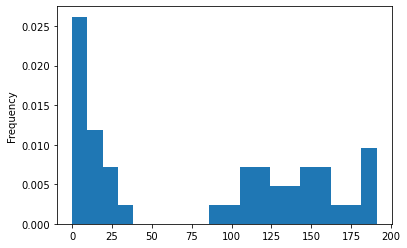

In [8]:
df_1920['Caught_Stealing'].plot.hist(bins=20, density=True)

<AxesSubplot:>

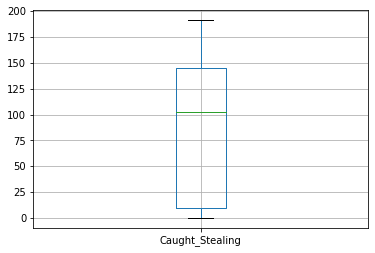

In [9]:
df_1920.boxplot(column='Caught_Stealing')

**The visual shape of 'Caught_Stealing' is not symmetric.**

<AxesSubplot:ylabel='Frequency'>

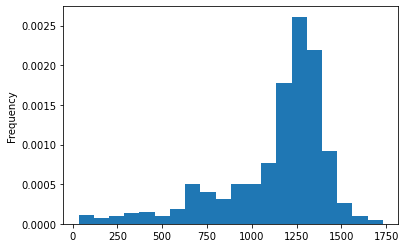

In [10]:
df_1920['Hits'].plot.hist(bins=20, density=True)

<AxesSubplot:>

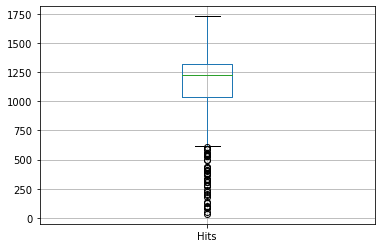

In [11]:
df_1920.boxplot(column='Hits')

**The visual shape of 'Hits' is not symmetric. It has one mode and it is narrow. There are many outliners.**

<AxesSubplot:ylabel='Frequency'>

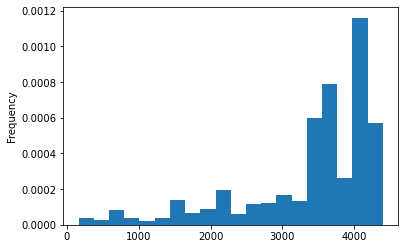

In [12]:
df_1920['Infield_Put_Outs'].plot.hist(bins=20, density=True)

<AxesSubplot:>

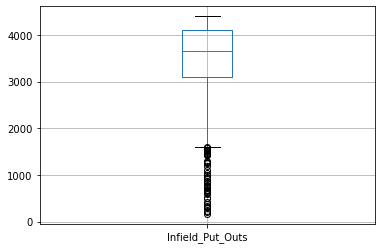

In [13]:
df_1920.boxplot(column='Infield_Put_Outs')

**The visual shape of 'Infield_Put_Outs' is not symmetric. There are many outliners.**

<AxesSubplot:ylabel='Frequency'>

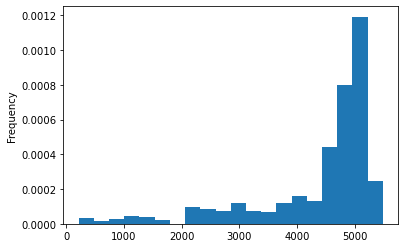

In [14]:
df_1920['At_Bats'].plot.hist(bins=20, density=True)

<AxesSubplot:>

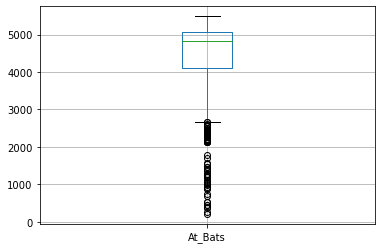

In [15]:
df_1920.boxplot(column='At_Bats')

**The visual shape of 'At_Bats' is not symmetric. There are many outliners.**

<AxesSubplot:ylabel='Frequency'>

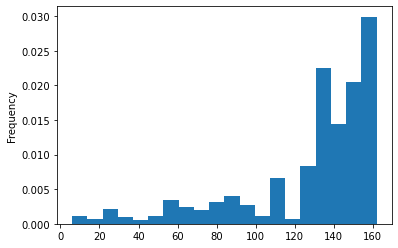

In [16]:
df_1920['Games_Played'].plot.hist(bins=20, density=True)

<AxesSubplot:>

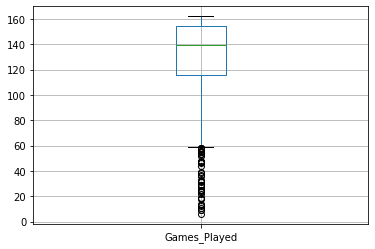

In [17]:
df_1920.boxplot(column='Games_Played')

**The visual shape of 'Games_Played' is not symmetric. There are many outliners.**

<AxesSubplot:ylabel='Frequency'>

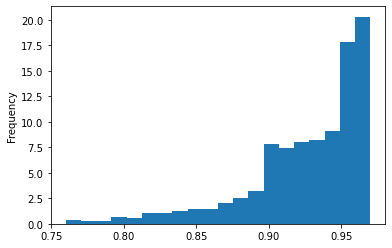

In [18]:
df_1920['Fielding_Percentage'].plot.hist(bins=20, density=True)

<AxesSubplot:>

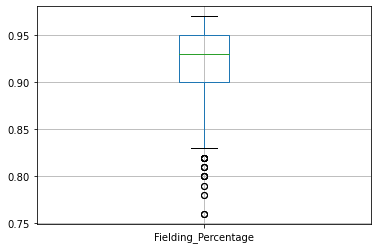

In [19]:
df_1920.boxplot(column='Fielding_Percentage')

**The visual shape of 'Fielding_Percentage' is not symmetric. There are some outliners.**

<AxesSubplot:ylabel='Frequency'>

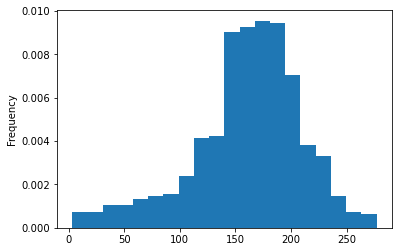

In [20]:
df_1920['Doubles'].plot.hist(bins=20, density=True)

<AxesSubplot:>

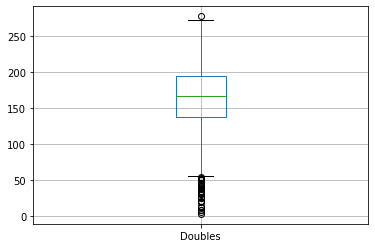

In [21]:
df_1920.boxplot(column='Doubles')

**The visual shape of 'Doubles' is close to symmetric. There are many outliners.**

<AxesSubplot:ylabel='Frequency'>

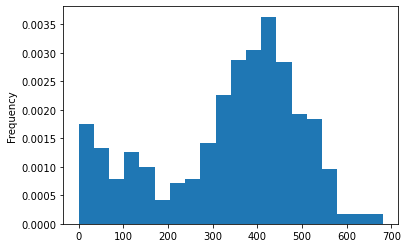

In [22]:
df_1920['Walks'].plot.hist(bins=20, density=True)

<AxesSubplot:>

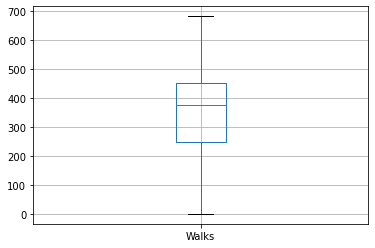

In [23]:
df_1920.boxplot(column='Walks')

**The visual shape of 'Walks' is not symmetric. There is no outliner.**

**Section 3 – Correlation Analysis**

In [24]:
df_1920[['Caught_Stealing','Hits','Infield_Put_Outs', 'At_Bats', 'Games_Played','Fielding_Percentage', 'Doubles','Walks']].corr()

,Caught_Stealing,Hits,Infield_Put_Outs,At_Bats,Games_Played,Fielding_Percentage,Doubles,Walks
Caught_Stealing,1.000000,0.895305,0.943704,0.922526,0.943815,0.917627,0.851077,0.933467
Hits,0.895305,1.000000,0.898052,0.946003,0.905877,0.790960,0.875189,0.829771
Infield_Put_Outs,0.943704,0.898052,1.000000,0.983225,0.997586,0.891558,0.756859,0.839668
At_Bats,0.922526,0.946003,0.983225,1.000000,0.987764,0.848008,0.802197,0.840788
Games_Played,0.943815,0.905877,0.997586,0.987764,1.000000,0.880804,0.760180,0.844984
Fielding_Percentage,0.917627,0.790960,0.891558,0.848008,0.880804,1.000000,0.685504,0.741792
Doubles,0.851077,0.875189,0.756859,0.802197,0.760180,0.685504,1.000000,0.719134
Walks,0.933467,0.829771,0.839668,0.840788,0.844984,0.741792,0.719134,1.000000


**The above 8 variables are linearly related to the dependent variable 'Games_Won', and five of them are offensive Measurements.  We can conclude that offensive Measurements are more effective before 1920.**

* 'Infield_Put_Outs''has high coefficient with'Games_Played' and 'At_Bats'. 
* 'Walks'/Fielding_Percentage have high coefficient with 'Caught_Stealing'.

**Section 4 – Linear Regression Models**

**Create an initial multiple linear regression model using 8 variables for period before 1920**

In [25]:
lm_1920=smf.ols(formula='Games_Won ~ Caught_Stealing + Hits + Infield_Put_Outs + At_Bats + Games_Played +  Fielding_Percentage + Doubles + Walks', data=df_1920).fit()
lm_1920.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     119.9
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           4.07e-23
Time:                        20:53:36   Log-Likelihood:                -141.69
No. Observations:                  44   AIC:                             301.4
Df Residuals:                      35   BIC:                             317.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -56.3069     53.708     -1.048      0.302    -165.340      52.726
Caught_Stealing         0.0082      0.057      0.143      0.887      -0.108       0.125
Hits                    0.1205      0.030      3.991      0.000       0.059       0.182
Infield_Put_Outs        0.2081      0.042      4.943      0.000       0.123       0.293
At_Bats                -0.0463      0.017     -2.730      0.010      -0.081      -0.012
Games_Played           -4.7840      1.191     -4.018      0.000      -7.201      -2.367
Fielding_Percentage    69.5503     69.597      0.999      0.324     -71.738     210.839
Doubles                 0.0807      0.064      1.271      0.212      -0.048       0.210
Walks                   0.0209      0.018      1.134      0.265      -0.017       0.058
==============================================================================
Omnibus:                        0.569   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.656
Skew:                          -0.052   Prob(JB):                        0.720
Kurtosis:                       2.411   Cond. No.                     4.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Second iteration**

**To keep the model simple, delete'Caught_Stealing' + Fielding_Percentage + Doubles + Walks + intercept because of their high P-Values**


In [26]:
lm_1920=smf.ols(formula='Games_Won ~ Hits + Infield_Put_Outs + At_Bats + Games_Played -1', data=df_1920).fit()
lm_1920.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              5732.
Date:                Sun, 17 Jul 2022   Prob (F-statistic):                        0.00
Time:                        20:53:36   Log-Likelihood:                         -2715.0
No. Observations:                 703   AIC:                                      5438.
Df Residuals:                     699   BIC:                                      5456.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Hits                 0.0870      0.005     16.932      0.000       0.077       0.097
Infield_Put_Outs     0.0986      0.007     14.512      0.000       0.085       0.112
At_Bats             -0.0275      0.003     -8.584      0.000      -0.034      -0.021
Games_Played        -1.9530      0.205     -9.535      0.000      -2.355      -1.551
==============================================================================
Omnibus:                        1.205   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.062
Skew:                           0.085   Prob(JB):                        0.588
Kurtosis:                       3.085   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Third iteration**

**Delete'Games_Played' and 'At_Bats', 'Infield_Put_Outs', because they has high coefficient with 'Infield_Put_Outs'.**

In [27]:
lm_1920=smf.ols(formula='Games_Won ~ Hits -1', data=df_1920).fit()
lm_1920.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          1.577e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):                        0.00
Time:                        20:53:36   Log-Likelihood:                         -2843.4
No. Observations:                 703   AIC:                                      5689.
Df Residuals:                     702   BIC:                                      5693.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hits           0.0558      0.000    125.572      0.000       0.055       0.057
==============================================================================
Omnibus:                        2.170   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                2.047
Skew:                          -0.081   Prob(JB):                        0.359
Kurtosis:                       3.209   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ajusted r2 and F-statistic are very large which is good and the p-values for the coefficient is close to zero which means is statisically significant. And also, the model is very simple. The independent variable is approximately normally distributed**

**Period 2 -  1920 to 1960**

**Section 2 – Data Exploration**

In [28]:
df_1920_1960=df[df['Year'].between(1920,1959)]

In [29]:
df_1920_1960.reset_index(drop=True, inplace=True)

In [30]:
df_1920_1960.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
0,1920,AL,BOS,BOS,NaN,5,154,76.0,72,81,...,1481,39,461,481,183,131.0,0.97,Boston Red Sox,Fenway Park I,402445.0
1,1920,NL,BRO,LAD,NaN,1,155,78.0,93,61,...,1381,25,327,553,226,118.0,0.96,Brooklyn Robins,Ebbets Field,808722.0
2,1920,NL,BSN,ATL,NaN,7,153,74.0,62,90,...,1464,39,415,368,239,125.0,0.96,Boston Braves,Braves Field,162483.0
3,1920,AL,CHA,CHW,NaN,2,154,77.0,96,58,...,1467,45,405,438,194,142.0,0.96,Chicago White Sox,Comiskey Park,833492.0
4,1920,NL,CHN,CHC,NaN,5,154,77.0,75,79,...,1459,37,382,508,225,112.0,0.96,Chicago Cubs,Wrigley Field,480783.0


In [31]:
df_1920_1960.corr()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Attendance
Year,1.000000,-0.001304,0.192082,0.097743,0.010198,0.010289,-0.258987,-0.210648,-0.584943,-0.466542,...,0.545567,0.150066,-0.555421,0.694801,0.405078,0.727917,-0.698763,0.338805,0.561683,0.482990
Final_Standing,-0.001304,1.000000,-0.100993,-0.194760,-0.943117,0.941480,-0.604405,-0.233620,-0.400515,-0.260416,...,-0.378809,-0.368772,0.463080,0.113610,0.231671,-0.302148,0.320931,-0.054454,-0.304868,-0.508392
Games_Played,0.192082,-0.100993,1.000000,0.578682,0.126110,-0.063668,0.052838,0.387640,0.027784,-0.003913,...,0.122603,0.683713,-0.036221,0.122384,0.116195,0.233522,-0.115146,0.113417,0.152909,0.227935
Unnamed: 7,0.097743,-0.194760,0.578682,1.000000,0.213334,-0.178210,0.104336,0.256315,0.081437,0.065151,...,0.069988,0.447107,-0.103691,0.018962,0.007245,0.173961,-0.133682,0.124200,0.155526,0.210293
Games_Won,0.010198,-0.943117,0.126110,0.213334,1.000000,-0.996277,0.631354,0.240289,0.409058,0.261418,...,0.406390,0.402680,-0.495191,-0.118193,-0.248450,0.331990,-0.347208,0.058955,0.324120,0.533717
Games_Lost,0.010289,0.941480,-0.063668,-0.178210,-0.996277,1.000000,-0.632325,-0.222175,-0.411843,-0.267111,...,-0.395021,-0.360497,0.493108,0.138471,0.256700,-0.309925,0.337765,-0.044732,-0.313448,-0.510924
Runs_Scored,-0.258987,-0.604405,0.052838,0.104336,0.631354,-0.632325,1.000000,0.522392,0.803037,0.646119,...,0.177893,0.042366,0.165700,0.037802,0.011666,0.050653,0.013402,0.034874,-0.033701,0.250720
At_Bats,-0.210648,-0.233620,0.387640,0.256315,0.240289,-0.222175,0.522392,1.000000,0.705432,0.537054,...,-0.054764,0.429028,0.319494,-0.031541,-0.050517,-0.024231,0.154297,0.018185,-0.090508,-0.057020
Hits,-0.584943,-0.400515,0.027784,0.081437,0.409058,-0.411843,0.803037,0.705432,1.000000,0.736214,...,-0.104987,0.046449,0.428339,-0.237101,-0.219626,-0.259469,0.321596,-0.101900,-0.261254,-0.056737
Doubles,-0.466542,-0.260416,-0.003913,0.065151,0.261418,-0.267111,0.646119,0.537054,0.736214,1.000000,...,-0.143947,-0.047540,0.426616,-0.208543,-0.080676,-0.231654,0.266792,-0.081168,-0.222275,-0.173723


**1. Calculate the descriptive statistics for the 8 variables**

In [32]:
df_1920_1960[['Games_Lost', 'Final_Standing', 'Runs_Against', 'Earned_Run_Average', 'Runs_Scored', 'Earned_Runs', 'Attendance', 'Shutout']].describe()

,Games_Lost,Final_Standing,Runs_Against,Earned_Run_Average,Runs_Scored,Earned_Runs,Attendance,Shutout
count,640.00000,640.000000,640.000000,640.000000,640.000000,640.000000,6.400000e+02,640.000000
mean,76.66875,4.478125,713.521875,4.011609,713.521875,612.798437,7.402853e+05,9.554688
std,14.20583,2.284771,105.294814,0.622430,107.179750,90.876630,4.272222e+05,4.330639
min,43.00000,1.000000,475.000000,2.550000,394.000000,399.000000,8.092200e+04,1.000000
25%,66.00000,2.000000,637.000000,3.580000,643.000000,548.000000,4.248002e+05,6.000000
50%,76.00000,4.000000,706.000000,3.950000,706.500000,603.500000,6.577445e+05,9.000000
75%,87.00000,6.000000,775.000000,4.390000,775.000000,669.000000,9.715562e+05,12.000000
max,115.00000,8.000000,1199.000000,6.710000,1067.000000,1023.000000,2.620627e+06,26.000000


**2. Show a histogram and boxplot for each of the 8 variables**

<AxesSubplot:ylabel='Frequency'>

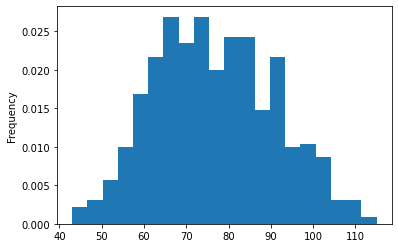

In [33]:
df_1920_1960['Games_Lost'].plot.hist(bins=20, density=True)

<AxesSubplot:>

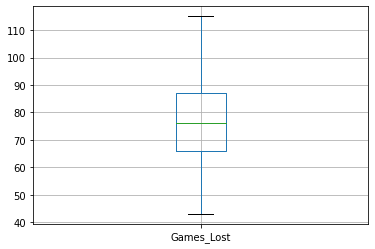

In [34]:
df_1920_1960.boxplot(column='Games_Lost')

**The visual shape of 'Games_Lost' is almost symmetric. It is wide. There is no outliner.**

<AxesSubplot:ylabel='Frequency'>

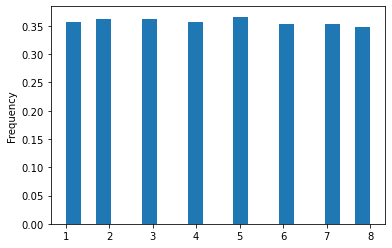

In [35]:
df_1920_1960['Final_Standing'].plot.hist(bins=20, density=True)

<AxesSubplot:>

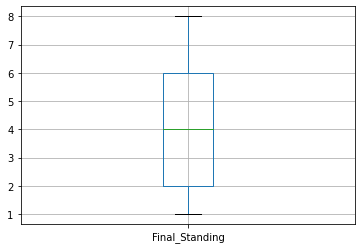

In [36]:
df_1920_1960.boxplot(column='Final_Standing')

**The visual shape of 'Final_Standing' is not symmetric. The data is ordinal.**

<AxesSubplot:ylabel='Frequency'>

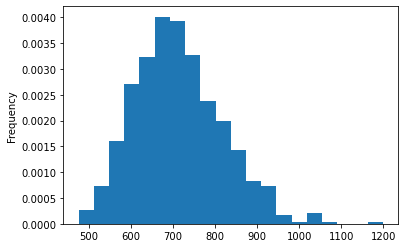

In [37]:
df_1920_1960['Runs_Against'].plot.hist(bins=20, density=True)

<AxesSubplot:>

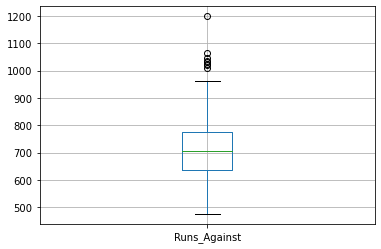

In [38]:
df_1920_1960.boxplot(column='Runs_Against')

**The visual shape of 'Runs_Against' is almost symmetric. It has one mode and it is narrow. There are some outliners.**

<AxesSubplot:ylabel='Frequency'>

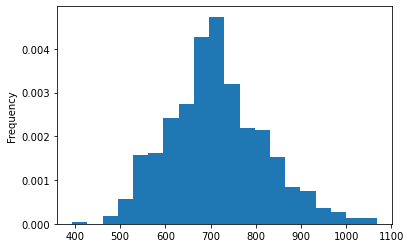

In [39]:
df_1920_1960['Runs_Scored'].plot.hist(bins=20, density=True)

<AxesSubplot:>

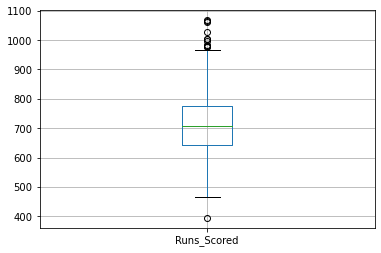

In [40]:
df_1920_1960.boxplot(column='Runs_Scored')

**The visual shape of 'Runs_Scored' is almost symmetric. It has one mode and it is wide. There are a few outliners.**

<AxesSubplot:ylabel='Frequency'>

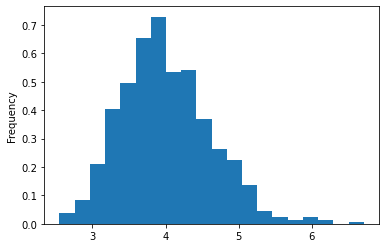

In [41]:
df_1920_1960['Earned_Run_Average'].plot.hist(bins=20, density=True)

<AxesSubplot:>

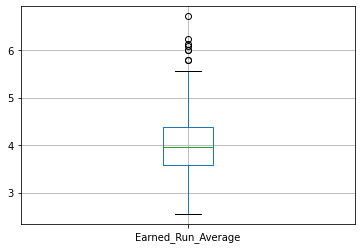

In [42]:
df_1920_1960.boxplot(column='Earned_Run_Average')

**The visual shape of 'Earned_Run_Average' is almost symmetric. It has one mode and it is wide. There are a few outliners.**

<AxesSubplot:ylabel='Frequency'>

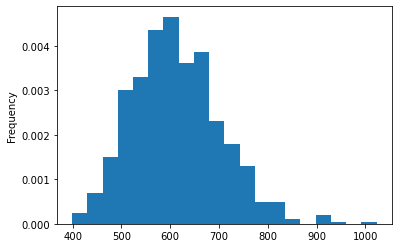

In [43]:
df_1920_1960['Earned_Runs'].plot.hist(bins=20, density=True)

<AxesSubplot:>

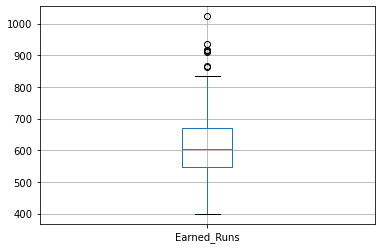

In [44]:
df_1920_1960.boxplot(column='Earned_Runs')

<AxesSubplot:ylabel='Frequency'>

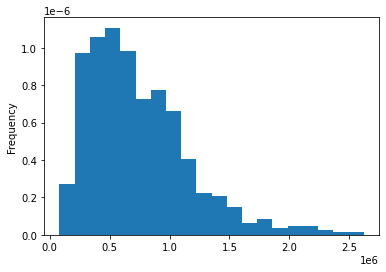

In [45]:
df_1920_1960['Attendance'].plot.hist(bins=20, density=True)

<AxesSubplot:>

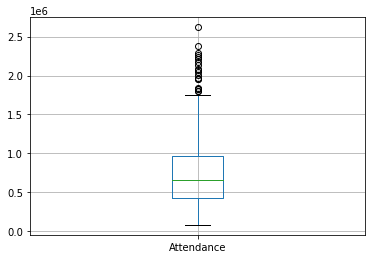

In [46]:
df_1920_1960.boxplot(column='Attendance')

**The visual shape of 'Attendance' is not symmetric. There are many outliners.**

<AxesSubplot:ylabel='Frequency'>

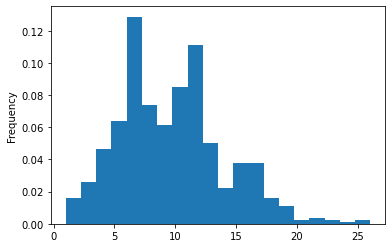

In [47]:
df_1920_1960['Shutout'].plot.hist(bins=20, density=True)

<AxesSubplot:>

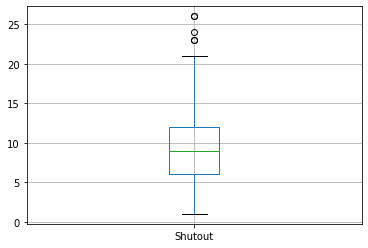

In [48]:
df_1920_1960.boxplot(column='Shutout')

**The visual shape of 'Shutout' is almost symmetric. It has two mode and it is wide. There are several outliners.**

**Section 3 – Correlation Analysis**

In [49]:
df_1920_1960[['Games_Lost', 'Final_Standing','Runs_Against','Earned_Run_Average', 'Runs_Scored', 'Earned_Runs', 'Attendance', 'Shutout']].corr()

,Games_Lost,Final_Standing,Runs_Against,Earned_Run_Average,Runs_Scored,Earned_Runs,Attendance,Shutout
Games_Lost,1.000000,0.941480,0.632839,0.621795,-0.632325,0.612572,-0.510924,-0.524259
Final_Standing,0.941480,1.000000,0.588324,0.581689,-0.604405,0.570624,-0.508392,-0.503074
Runs_Against,0.632839,0.588324,1.000000,0.967489,0.126268,0.968640,-0.440889,-0.721828
Earned_Run_Average,0.621795,0.581689,0.967489,1.000000,0.112615,0.996010,-0.369547,-0.705181
Runs_Scored,-0.632325,-0.604405,0.126268,0.112615,1.000000,0.124004,0.250720,-0.014833
Earned_Runs,0.612572,0.570624,0.968640,0.996010,0.124004,1.000000,-0.355509,-0.701975
Attendance,-0.510924,-0.508392,-0.440889,-0.369547,0.250720,-0.355509,1.000000,0.380822
Shutout,-0.524259,-0.503074,-0.721828,-0.705181,-0.014833,-0.701975,0.380822,1.000000


**The above 8 variables are linearly related to the dependent variable 'Games_Won', and four of them are defensive Measurements and only one of them is offensive Measurement.  We can conclude that defensive Measurements are more effective from 1920-1960.**

* 'Runs_Against' has very high coefficient with'Earned_Run_Average' and 'Earned_Runs'. 
* 'Games_Lost' have high coefficient with 'Final_Standing'.


**Section 4 – Linear Regression Models**

**1. Initial Regression model using all input variables to predict Games_Won for period 1920-1960**

In [50]:
lm_1920_1960=smf.ols(formula ='Games_Won ~ Games_Lost+ Final_Standing + Runs_Against + Earned_Run_Average+  Runs_Scored+ Earned_Runs+ Attendance+ Shutout', data=df_1920_1960).fit()
lm_1920_1960.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.767e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:53:38   Log-Likelihood:                -878.46
No. Observations:                 640   AIC:                             1775.
Df Residuals:                     631   BIC:                             1815.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            146.1450      0.941    155.285      0.000     144.297     147.993
Games_Lost            -0.9355      0.012    -79.098      0.000      -0.959      -0.912
Final_Standing        -0.1726      0.050     -3.457      0.001      -0.271      -0.075
Runs_Against          -0.0004      0.002     -0.223      0.823      -0.004       0.003
Earned_Run_Average   -11.6896      0.704    -16.610      0.000     -13.072     -10.308
Runs_Scored            0.0025      0.001      2.579      0.010       0.001       0.004
Earned_Runs            0.0777      0.005     15.586      0.000       0.068       0.088
Attendance          8.615e-07   1.14e-07      7.561      0.000    6.38e-07    1.09e-06
Shutout                0.0172      0.013      1.341      0.181      -0.008       0.042
==============================================================================
Omnibus:                      147.181   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.545
Skew:                          -1.141   Prob(JB):                     1.05e-87
Kurtosis:                       6.133   Cond. No.                     2.13e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**2. Second iteration**
* To keep the model simple, delete 'Runs_Against'+ 'Shutout' because of their high P-Values


In [51]:
lm_1920_1960=smf.ols(formula ='Games_Won ~ Games_Lost+ Final_Standing+Earned_Run_Average+Runs_Scored+Earned_Runs+Attendance', data=df_1920_1960).fit()
lm_1920_1960.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.356e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:53:38   Log-Likelihood:                -879.45
No. Observations:                 640   AIC:                             1773.
Df Residuals:                     633   BIC:                             1804.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            146.7630      0.820    178.939      0.000     145.152     148.374
Games_Lost            -0.9376      0.011    -86.248      0.000      -0.959      -0.916
Final_Standing        -0.1749      0.050     -3.514      0.000      -0.273      -0.077
Earned_Run_Average   -11.7350      0.703    -16.695      0.000     -13.115     -10.355
Runs_Scored            0.0023      0.001      2.690      0.007       0.001       0.004
Earned_Runs            0.0773      0.005     16.132      0.000       0.068       0.087
Attendance          8.887e-07   1.06e-07      8.416      0.000    6.81e-07     1.1e-06
==============================================================================
Omnibus:                      144.809   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.478
Skew:                          -1.131   Prob(JB):                     1.97e-84
Kurtosis:                       6.056   Cond. No.                     1.89e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3. Third iteration**
* Delete 'Final_Standing' because it has high coefficient with 'Games_Lost'
* Delete 'Earned_Runs', because it has high coefficient with ''arned_Run_Average'.
* To keep the model, try to delete 'Runs_Scored' and 'Attendance' 

In [52]:
lm_1920_1960=smf.ols(formula ='Games_Won ~ Games_Lost+Earned_Run_Average', data=df_1920_1960).fit()
lm_1920_1960.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 4.267e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:53:38   Log-Likelihood:                -1042.0
No. Observations:                 640   AIC:                             2090.
Df Residuals:                     637   BIC:                             2103.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            154.0089      0.330    466.145      0.000     153.360     154.658
Games_Lost            -1.0014      0.004   -227.917      0.000      -1.010      -0.993
Earned_Run_Average    -0.1416      0.100     -1.412      0.159      -0.338       0.055
==============================================================================
Omnibus:                      307.361   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1763.300
Skew:                          -2.114   Prob(JB):                         0.00
Kurtosis:                       9.946   Cond. No.                         537.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ajusted r2 and F-statistic are very large which is good and the p-values for the coefficient is close to zero which means is statisically significant. And also, the model is very simple. The independent variable is normally distributed**

**Period 3 – 1960 to 1990**

**Section 2 – Data Exploration**

In [53]:
df_1960_1990=df[df['Year'].between(1960,1989)]

In [54]:
df_1960_1990.reset_index(drop=True, inplace=True)

In [55]:
df_1960_1990.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
0,1960,AL,BAL,BAL,NaN,2,154,77.0,89,65,...,1222,117,552,785,107,172.0,0.98,Baltimore Orioles,Memorial Stadium,1187849.0
1,1960,AL,BOS,BOS,NaN,7,154,77.0,65,89,...,1440,127,580,767,140,156.0,0.97,Boston Red Sox,Fenway Park II,1129866.0
2,1960,AL,CHA,CHW,NaN,3,154,77.0,87,67,...,1338,127,533,695,109,175.0,0.98,Chicago White Sox,Comiskey Park,1644460.0
3,1960,NL,CHN,CHC,NaN,7,156,79.0,60,94,...,1393,152,565,805,143,133.0,0.97,Chicago Cubs,Wrigley Field,809770.0
4,1960,NL,CIN,CIN,NaN,6,154,77.0,67,87,...,1417,134,442,740,125,155.0,0.97,Cincinnati Reds,Crosley Field,663486.0


In [56]:
df_1960_1990.corr()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Attendance
Year,1.000000,-0.219368,-0.082544,-0.081487,-0.030197,-0.030379,0.119263,-0.047895,0.120564,0.404803,...,0.284192,-0.091672,0.122212,-0.045908,0.007694,-0.147599,-0.243509,-0.049673,0.216970,0.462684
Final_Standing,-0.219368,1.000000,0.020926,0.023683,-0.756847,0.774922,-0.437401,-0.031391,-0.274613,-0.277202,...,-0.402218,-0.031503,0.226103,0.225313,0.270035,-0.045049,0.305411,0.017248,-0.268490,-0.489631
Games_Played,-0.082544,0.020926,1.000000,0.986734,0.415874,0.407425,0.514936,0.973640,0.724570,0.427595,...,0.220178,0.988206,0.726286,0.390661,0.448790,0.531179,0.428791,0.443939,-0.053736,0.156195
Unnamed: 7,-0.081487,0.023683,0.986734,1.000000,0.405932,0.406184,0.505312,0.959834,0.711020,0.418016,...,0.213483,0.975334,0.722240,0.391438,0.449492,0.525371,0.422386,0.438356,-0.054170,0.152820
Games_Won,-0.030197,-0.756847,0.415874,0.405932,1.000000,-0.660376,0.674340,0.460104,0.577827,0.416449,...,0.505286,0.466749,0.041663,-0.009140,-0.161321,0.350046,-0.141401,0.165136,0.251768,0.490527
Games_Lost,-0.030379,0.774922,0.407425,0.406184,-0.660376,1.000000,-0.251263,0.341272,0.018574,-0.061234,...,-0.322977,0.346470,0.558889,0.331676,0.534751,0.085264,0.492975,0.201509,-0.293903,-0.361410
Runs_Scored,0.119263,-0.437401,0.514936,0.505312,0.674340,-0.251263,1.000000,0.620850,0.848213,0.702693,...,0.380488,0.515172,0.527956,0.487935,0.208417,0.219473,0.050117,0.348456,0.097371,0.399825
At_Bats,-0.047895,-0.031391,0.973640,0.959834,0.460104,0.341272,0.620850,1.000000,0.836112,0.529217,...,0.246753,0.975238,0.759806,0.417446,0.434627,0.505559,0.406036,0.470125,-0.042724,0.194801
Hits,0.120564,-0.274613,0.724570,0.711020,0.577827,0.018574,0.848213,0.836112,1.000000,0.735639,...,0.317421,0.723802,0.691017,0.382484,0.285931,0.283859,0.216960,0.452050,0.027017,0.338387
Doubles,0.404803,-0.277202,0.427595,0.418016,0.416449,-0.061234,0.702693,0.529217,0.735639,1.000000,...,0.365925,0.421235,0.496162,0.298960,0.180209,0.138220,-0.013682,0.260508,0.132456,0.409354


**1. Calculate the descriptive statistics for the 8 variables**

In [57]:
df_1960_1990[['Final_Standing','Runs_Scored','Games_Lost','Hits','Saves','Attendance','Earned_Run_Average','Infield_Put_Outs']].describe()

,Final_Standing,Runs_Scored,Games_Lost,Hits,Saves,Attendance,Earned_Run_Average,Infield_Put_Outs
count,704.000000,704.000000,704.000000,704.000000,704.000000,7.040000e+02,704.000000,704.000000
mean,4.049716,665.413352,79.590909,1380.603693,32.806818,1.437778e+06,3.715000,4287.139205
std,2.227866,93.438707,12.646984,126.142001,9.318585,6.315309e+05,0.478665,281.413523
min,1.000000,329.000000,42.000000,797.000000,10.000000,3.067630e+05,2.450000,2767.000000
25%,2.000000,613.000000,71.000000,1327.000000,26.000000,9.436432e+05,3.370000,4302.000000
50%,4.000000,673.000000,79.000000,1395.000000,32.000000,1.300845e+06,3.710000,4347.000000
75%,6.000000,729.000000,88.000000,1455.500000,40.000000,1.834691e+06,4.032500,4383.000000
max,10.000000,896.000000,120.000000,1633.000000,64.000000,3.608881e+06,5.280000,4518.000000


**2. Show a histogram and boxplot for each of the 8 variables**

<AxesSubplot:ylabel='Frequency'>

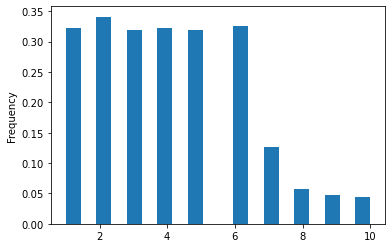

In [58]:
df_1960_1990['Final_Standing'].plot.hist(bins=20, density=True)

<AxesSubplot:>

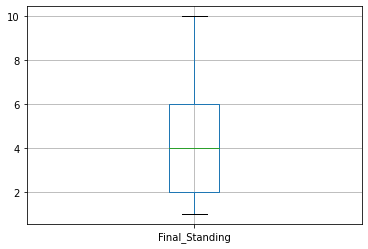

In [59]:
df_1960_1990.boxplot(column='Final_Standing')

**The visual shape of 'Final_Standing' is not symmetric. The data is ordinal.**

<AxesSubplot:ylabel='Frequency'>

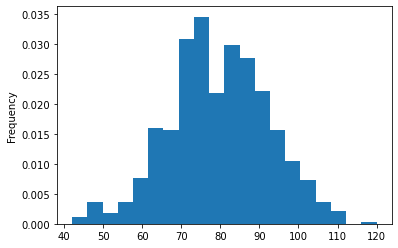

In [60]:
df_1960_1990['Games_Lost'].plot.hist(bins=20, density=True)

<AxesSubplot:>

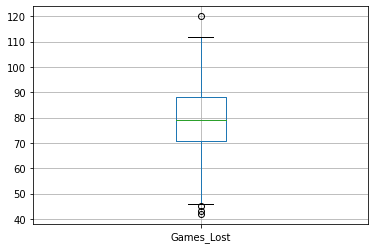

In [61]:
df_1960_1990.boxplot(column='Games_Lost')

**The visual shape of 'Games_Lost' is alomost symmetric, there are a few outliners.**

<AxesSubplot:ylabel='Frequency'>

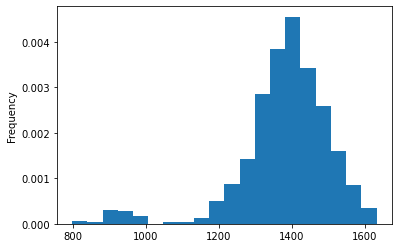

In [62]:
df_1960_1990['Hits'].plot.hist(bins=20, density=True)

<AxesSubplot:>

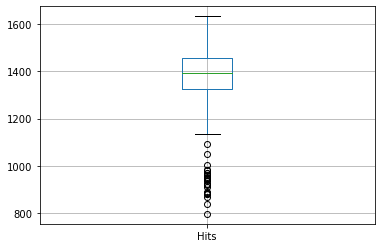

In [63]:
df_1960_1990.boxplot(column='Hits')

**The visual shape of 'Hits' is not symmetric. It has one mode and it is narrow. There are many outliners.**

<AxesSubplot:ylabel='Frequency'>

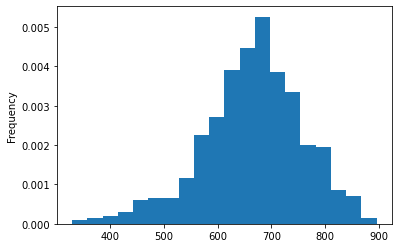

In [64]:
df_1960_1990['Runs_Scored'].plot.hist(bins=20, density=True)

<AxesSubplot:>

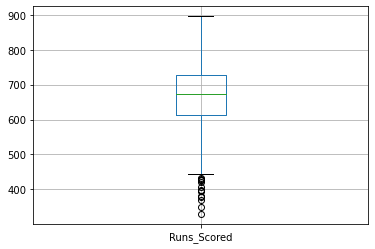

In [65]:
df_1960_1990.boxplot(column='Runs_Scored')

**The visual shape of 'Runs_Scored' is almost symmetric. It has one mode and it is wide. There are a few outliners.**

<AxesSubplot:ylabel='Frequency'>

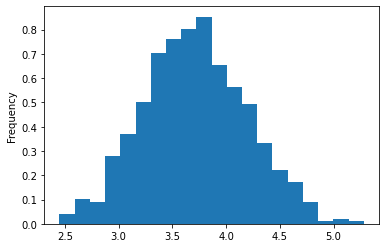

In [66]:
df_1960_1990['Earned_Run_Average'].plot.hist(bins=20, density=True)

<AxesSubplot:>

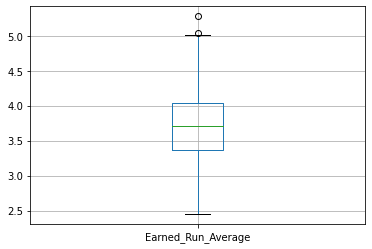

In [67]:
df_1960_1990.boxplot(column='Earned_Run_Average')

**The visual shape of 'Earned_Run_Average' is almost symmetric. It has one mode and it is wide. There are a few outliners.**

<AxesSubplot:ylabel='Frequency'>

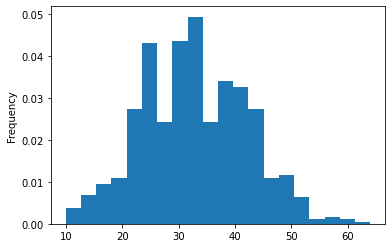

In [68]:
df_1960_1990['Saves'].plot.hist(bins=20, density=True)

<AxesSubplot:>

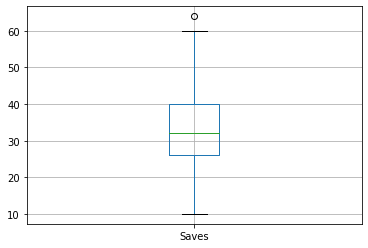

In [69]:
df_1960_1990.boxplot(column='Saves')

**The visual shape of 'Saves' is kind of symmetric. There is one outliner.**

<AxesSubplot:ylabel='Frequency'>

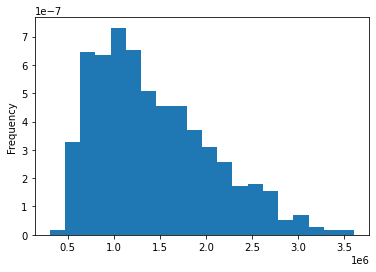

In [70]:
df_1960_1990['Attendance'].plot.hist(bins=20, density=True)

<AxesSubplot:>

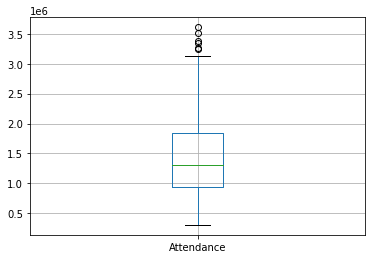

In [71]:
df_1960_1990.boxplot(column='Attendance')

**The visual shape of 'Attendance' is not symmetric. There are some outliners.**

<AxesSubplot:ylabel='Frequency'>

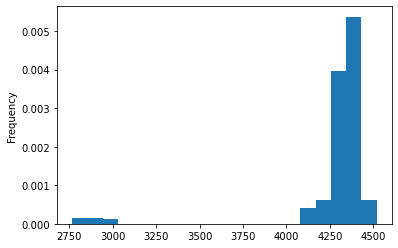

In [72]:
df_1960_1990['Infield_Put_Outs'].plot.hist(bins=20, density=True)

<AxesSubplot:>

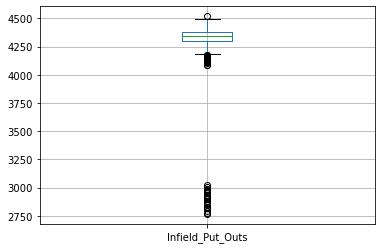

In [73]:
df_1960_1990.boxplot(column='Infield_Put_Outs')

**The visual shape of 'Infield_Put_Outs' is not symmetric. There are many outliners.**

**Section 3 – Correlation Analysis**

In [74]:
df_1960_1990[['Final_Standing','Runs_Scored','Games_Lost','Hits','Saves','Attendance','Earned_Run_Average','Infield_Put_Outs']].corr()

,Final_Standing,Runs_Scored,Games_Lost,Hits,Saves,Attendance,Earned_Run_Average,Infield_Put_Outs
Final_Standing,1.000000,-0.437401,0.774922,-0.274613,-0.402218,-0.489631,0.439074,-0.031503
Runs_Scored,-0.437401,1.000000,-0.251263,0.848213,0.380488,0.399825,0.243249,0.515172
Games_Lost,0.774922,-0.251263,1.000000,0.018574,-0.322977,-0.361410,0.525496,0.346470
Hits,-0.274613,0.848213,0.018574,1.000000,0.317421,0.338387,0.201692,0.723802
Saves,-0.402218,0.380488,-0.322977,0.317421,1.000000,0.368077,-0.130315,0.240745
Attendance,-0.489631,0.399825,-0.361410,0.338387,0.368077,1.000000,-0.135895,0.176987
Earned_Run_Average,0.439074,0.243249,0.525496,0.201692,-0.130315,-0.135895,1.000000,-0.016557
Infield_Put_Outs,-0.031503,0.515172,0.346470,0.723802,0.240745,0.176987,-0.016557,1.000000


**The above 8 variables are linearly related to the dependent variable 'Games_Won', and three of them are offensive Measurements and two of them are defensive Measurements.  We can conclude that defensive Measurements are a little bit more effective than offensive Measurement, but almost the same.**

* 'Hits''has high coefficient with'Runs_Scored'. 
* 'Final_Standing'have high coefficient with 'Games_Lost'  .


**Section 4 – Linear Regression Models**

**1. Create an initial multiple linear regression model using 8 variables for period 1960_1990**

In [75]:
lm_1960_1990=smf.ols(formula ='Games_Won ~ Final_Standing+ Runs_Scored+ Games_Lost+ Hits+ Saves+ Attendance+ Earned_Run_Average+ Infield_Put_Outs', data=df_1960_1990).fit()
lm_1960_1990.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     7237.
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:53:39   Log-Likelihood:                -1228.1
No. Observations:                 704   AIC:                             2474.
Df Residuals:                     695   BIC:                             2515.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.5221      1.254      2.011      0.045       0.060       4.984
Final_Standing        -0.0929      0.045     -2.082      0.038      -0.181      -0.005
Runs_Scored            0.0090      0.002      5.063      0.000       0.006       0.013
Games_Lost            -0.8781      0.014    -62.848      0.000      -0.906      -0.851
Hits                   0.0002      0.001      0.199      0.842      -0.002       0.002
Saves                  0.0169      0.007      2.518      0.012       0.004       0.030
Attendance          1.015e-07      1e-07      1.014      0.311    -9.5e-08    2.98e-07
Earned_Run_Average    -0.2576      0.262     -0.983      0.326      -0.772       0.257
Infield_Put_Outs       0.0330      0.001     62.684      0.000       0.032       0.034
==============================================================================
Omnibus:                       10.605   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.914
Skew:                          -0.297   Prob(JB):                      0.00427
Kurtosis:                       2.864   Cond. No.                     3.80e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**2. Second iteration**
* To keep the model simple, delete 'Hits + Attendance + Earned_Run_Average' because of their high P-Values
* Delete 'Final_Standing' because it has high coefficient with 'Games_Lost'.

In [76]:
lm_1960_1990=smf.ols(formula ='Games_Won ~  Runs_Scored+ Games_Lost+ Saves+ Infield_Put_Outs', data=df_1960_1990).fit()
lm_1960_1990.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:53:39   Log-Likelihood:                -1231.9
No. Observations:                 704   AIC:                             2474.
Df Residuals:                     699   BIC:                             2497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.3107      0.807      1.624      0.105      -0.274       2.895
Runs_Scored          0.0082      0.001     10.501      0.000       0.007       0.010
Games_Lost          -0.9042      0.006   -161.146      0.000      -0.915      -0.893
Saves                0.0177      0.007      2.701      0.007       0.005       0.031
Infield_Put_Outs     0.0336      0.000    121.924      0.000       0.033       0.034
==============================================================================
Omnibus:                       11.498   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.880
Skew:                          -0.314   Prob(JB):                      0.00263
Kurtosis:                       2.896   Cond. No.                     6.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3. delete 'Intercept' because of its high P-Values**
* **To keep the model simple, try to delete 'Infield_Put_Outs' and 'Saves'**


In [77]:
lm_1960_1990=smf.ols(formula ='Games_Won ~  Runs_Scored+ Games_Lost -1', data=df_1960_1990).fit()
lm_1960_1990.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          2.509e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):                        0.00
Time:                        20:53:39   Log-Likelihood:                         -2581.4
No. Observations:                 704   AIC:                                      5167.
Df Residuals:                     702   BIC:                                      5176.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.1331      0.002     58.240      0.000       0.129       0.138
Games_Lost     -0.1206      0.019     -6.328      0.000      -0.158      -0.083
==============================================================================
Omnibus:                        0.956   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                1.046
Skew:                           0.065   Prob(JB):                        0.593
Kurtosis:                       2.863   Cond. No.                         36.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ajusted r2 and F-statistic are very large which is good and the p-values for the coefficient is close to zero which means is statisically significant. And also, the model is very simple. The independent variable is approximately normally distributed**

**Period 4 – 1990 to 2010**

**Section 2 – Data Exploration**

In [78]:
df_1990_2010=df[df['Year'].between(1990,2010)]

df_1990_2010.reset_index(drop=True, inplace=True)

df_1990_2010.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
0,1990,NL,ATL,ATL,W,6,162,81.0,65,97,...,1527,128,579,938,158,133.0,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,980129.0
1,1990,AL,BAL,BAL,E,5,161,80.0,76,85,...,1445,161,537,776,91,151.0,0.98,Baltimore Orioles,Memorial Stadium,2415189.0
2,1990,AL,BOS,BOS,E,1,162,81.0,88,74,...,1439,92,519,997,123,154.0,0.98,Boston Red Sox,Fenway Park II,2528986.0
3,1990,AL,CAL,ANA,W,4,162,81.0,80,82,...,1482,106,544,944,140,186.0,0.97,California Angels,Anaheim Stadium,2555688.0
4,1990,AL,CHA,CHW,W,2,162,80.0,94,68,...,1313,106,548,914,124,169.0,0.98,Chicago White Sox,Comiskey Park,2002357.0


In [79]:
df_1990_2010.corr()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Attendance
Year,1.000000,-0.102183,0.287844,0.281571,0.123664,0.123898,0.227369,0.306147,0.277135,0.488262,...,0.006442,0.267082,0.262800,0.399072,0.067532,0.512945,-0.309249,0.188359,0.603883,0.204119
Final_Standing,-0.102183,1.000000,0.052529,0.041957,-0.741113,0.788517,-0.431553,0.015545,-0.194709,-0.165722,...,-0.458741,0.005764,0.298186,0.162129,0.311767,-0.266053,0.316957,0.177746,-0.243729,-0.401098
Games_Played,0.287844,0.052529,1.000000,0.979662,0.431287,0.426342,0.456536,0.977186,0.756702,0.521019,...,0.375009,0.991657,0.715717,0.336367,0.426248,0.546128,0.287454,0.476718,0.159657,0.207552
Unnamed: 7,0.281571,0.041957,0.979662,1.000000,0.427578,0.412622,0.451428,0.957495,0.744344,0.511617,...,0.372312,0.972317,0.708665,0.338435,0.409030,0.531467,0.270024,0.465946,0.170231,0.222332
Games_Won,0.123664,-0.741113,0.431287,0.427578,1.000000,-0.632107,0.627615,0.451233,0.548153,0.391859,...,0.702968,0.482071,-0.005547,-0.117280,-0.151105,0.491782,-0.165894,0.052713,0.282799,0.517426
Games_Lost,0.123898,0.788517,0.426342,0.412622,-0.632107,1.000000,-0.237626,0.386741,0.100145,0.054205,...,-0.383305,0.368332,0.619475,0.405548,0.517503,-0.023376,0.412501,0.356514,-0.145231,-0.340424
Runs_Scored,0.227369,-0.431553,0.456536,0.451428,0.627615,-0.237626,1.000000,0.566294,0.812417,0.666345,...,0.273339,0.459865,0.483065,0.456906,0.233159,0.341290,-0.018373,0.292467,0.200377,0.383966
At_Bats,0.306147,0.015545,0.977186,0.957495,0.451233,0.386741,0.566294,1.000000,0.856838,0.603605,...,0.351569,0.976522,0.754550,0.395554,0.441981,0.541776,0.255382,0.494612,0.180787,0.232912
Hits,0.277135,-0.194709,0.756702,0.744344,0.548153,0.100145,0.812417,0.856838,1.000000,0.715815,...,0.322362,0.756826,0.676103,0.441132,0.345346,0.449514,0.105993,0.433575,0.207507,0.337903
Doubles,0.488262,-0.165722,0.521019,0.511617,0.391859,0.054205,0.666345,0.603605,0.715815,1.000000,...,0.165411,0.512710,0.499351,0.408222,0.220238,0.454268,-0.044384,0.310247,0.336496,0.175485


**1. Calculate the descriptive statistics for the 8 variables**

In [80]:
df_1990_2010[['Final_Standing','Saves','Games_Lost','Runs_Scored','Earned_Run_Average','Hits','Walks','Shutout']].describe()

,Final_Standing,Saves,Games_Lost,Runs_Scored,Earned_Run_Average,Hits,Walks,Shutout
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,3.120066,40.047697,79.445724,747.483553,4.344375,1441.445724,536.782895,8.276316
std,1.562659,7.784962,12.259697,93.733980,0.547203,117.725690,78.410122,3.856909
min,1.000000,20.000000,40.000000,466.000000,3.060000,963.000000,319.000000,0.000000
25%,2.000000,35.000000,71.000000,686.000000,3.950000,1398.000000,486.750000,6.000000
50%,3.000000,40.000000,79.000000,747.000000,4.310000,1452.500000,533.000000,8.000000
75%,4.000000,45.000000,88.000000,807.000000,4.712500,1510.250000,589.250000,11.000000
max,7.000000,68.000000,119.000000,1009.000000,6.380000,1684.000000,775.000000,24.000000


**2. Show a histogram and boxplot for each of the 8 variables**

<AxesSubplot:ylabel='Frequency'>

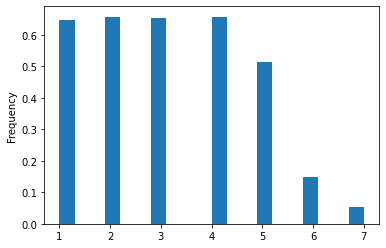

In [81]:
df_1990_2010['Final_Standing'].plot.hist(bins=20, density=True)

<AxesSubplot:>

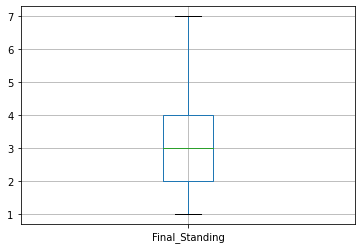

In [82]:
df_1990_2010.boxplot(column='Final_Standing')

**The visual shape of 'Final_Standing' is not symmetric. The data is ordinal.**

<AxesSubplot:ylabel='Frequency'>

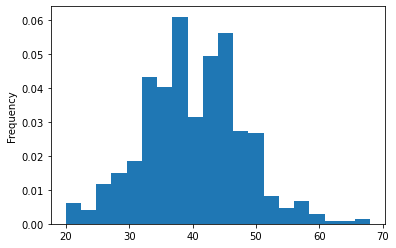

In [83]:
df_1990_2010['Saves'].plot.hist(bins=20, density=True)

<AxesSubplot:>

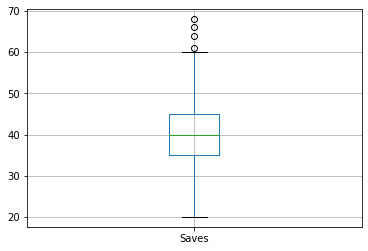

In [84]:
df_1990_2010.boxplot(column='Saves')

**The visual shape of 'Saves' is kind of symmetric. There are two modes. There are several outliners.**

<AxesSubplot:ylabel='Frequency'>

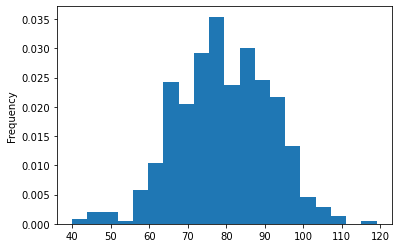

In [85]:
df_1990_2010['Games_Lost'].plot.hist(bins=20, density=True)

<AxesSubplot:>

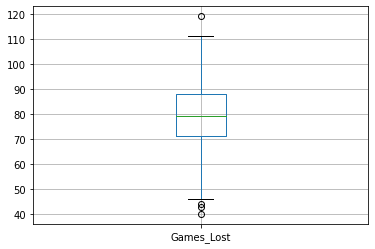

In [86]:
df_1990_2010.boxplot(column='Games_Lost')

**The visual shape of 'Games_Lost' is alomost symmetric, there are a few outliners.**

<AxesSubplot:ylabel='Frequency'>

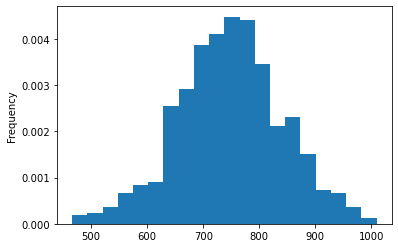

In [87]:
df_1990_2010['Runs_Scored'].plot.hist(bins=20, density=True)

<AxesSubplot:>

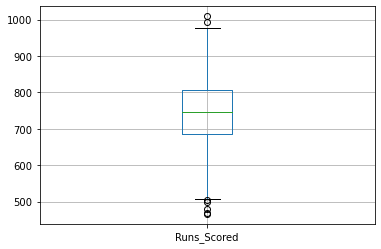

In [88]:
df_1990_2010.boxplot(column='Runs_Scored')

**The visual shape of 'Runs_Scored' is almost symmetric. It has one mode and it is wide. There are a few outliners.**

<AxesSubplot:ylabel='Frequency'>

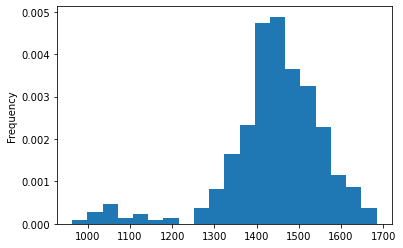

In [89]:
df_1990_2010['Hits'].plot.hist(bins=20, density=True)

<AxesSubplot:>

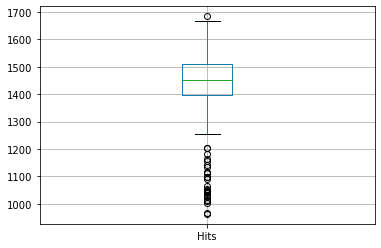

In [90]:
df_1990_2010.boxplot(column='Hits')

**The visual shape of 'Hits' is not symmetric. It has one mode and it is narrow. There are many outliners.**

<AxesSubplot:ylabel='Frequency'>

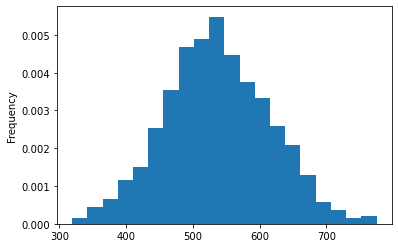

In [91]:
df_1990_2010['Walks'].plot.hist(bins=20, density=True)

<AxesSubplot:>

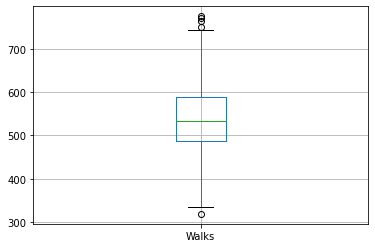

In [92]:
df_1990_2010.boxplot(column='Walks')

**The visual shape of 'Walks' is symmetric. It has one mode and it is wide. There are a few outliners.**

<AxesSubplot:ylabel='Frequency'>

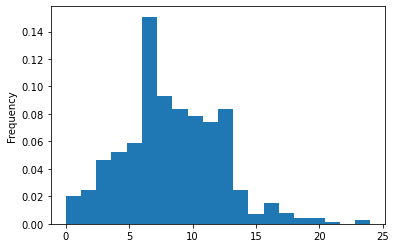

In [93]:
df_1990_2010['Shutout'].plot.hist(bins=20, density=True)

<AxesSubplot:>

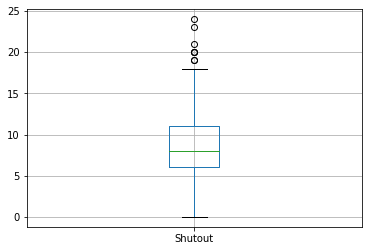

In [94]:
df_1990_2010.boxplot(column='Shutout')

**The visual shape of 'Shutout' is not symmetric. There are several outliners.**

<AxesSubplot:ylabel='Frequency'>

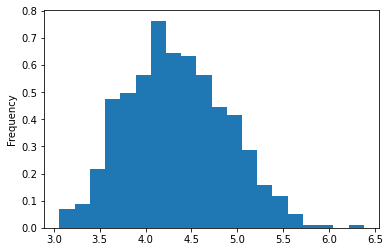

In [95]:
df_1990_2010['Earned_Run_Average'].plot.hist(bins=20, density=True)

<AxesSubplot:>

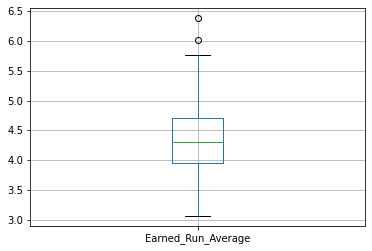

In [96]:
df_1990_2010.boxplot(column='Earned_Run_Average')

**The visual shape of 'Earned_Run_Average' is almost symmetric. It has one mode and it is wide. There are two outliners.**

**Section 3 – Correlation Analysis**

In [97]:
df_1990_2010[['Final_Standing','Saves','Games_Lost','Runs_Scored','Hits','Walks','Shutout','Earned_Run_Average']].corr()

,Final_Standing,Saves,Games_Lost,Runs_Scored,Hits,Walks,Shutout,Earned_Run_Average
Final_Standing,1.000000,-0.458741,0.788517,-0.431553,-0.194709,-0.346693,-0.283777,0.405788
Saves,-0.458741,1.000000,-0.383305,0.273339,0.322362,0.266852,0.374470,-0.462619
Games_Lost,0.788517,-0.383305,1.000000,-0.237626,0.100145,-0.193270,-0.237612,0.487567
Runs_Scored,-0.431553,0.273339,-0.237626,1.000000,0.812417,0.651081,0.035839,0.203573
Hits,-0.194709,0.322362,0.100145,0.812417,1.000000,0.440473,0.161952,0.119606
Walks,-0.346693,0.266852,-0.193270,0.651081,0.440473,1.000000,0.123384,-0.027009
Shutout,-0.283777,0.374470,-0.237612,0.035839,0.161952,0.123384,1.000000,-0.631549
Earned_Run_Average,0.405788,-0.462619,0.487567,0.203573,0.119606,-0.027009,-0.631549,1.000000


**The above 8 variables are linearly related to the dependent variable 'Games_Won', and three of them are offensive Measurements and two of them are defensive Measurements.  We can conclude that defensive Measurements are the same important as offensive Measurements for the team's  'Games_Won'.**

* 'Hits''has high coefficient with'Runs_Scored'. 
* 'Final_Standing'have high coefficient with 'Games_Lost'.
* 'Earned_Run_Average' have high coefficient with 'Shutout'


**Section 4 – Linear Regression Models**

**1. Create an initial multiple linear regression model using 8 variables for period 1990_2010**

In [98]:
lm_1990_2010=smf.ols(formula ='Games_Won ~ Final_Standing + Saves + Games_Lost + Runs_Scored + Earned_Run_Average+  Hits + Walks + Shutout ', data=df_1990_2010).fit()
lm_1990_2010.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1594.
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:53:41   Log-Likelihood:                -1443.6
No. Observations:                 608   AIC:                             2905.
Df Residuals:                     599   BIC:                             2945.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             45.8175      1.926     23.793      0.000      42.036      49.599
Final_Standing        -0.9001      0.126     -7.128      0.000      -1.148      -0.652
Saves                  0.3124      0.018     17.493      0.000       0.277       0.348
Games_Lost            -0.2203      0.020    -11.108      0.000      -0.259      -0.181
Runs_Scored            0.0373      0.004      9.863      0.000       0.030       0.045
Earned_Run_Average    -7.4216      0.367    -20.233      0.000      -8.142      -6.701
Hits                   0.0247      0.002     10.134      0.000       0.020       0.029
Walks                  0.0142      0.002      7.052      0.000       0.010       0.018
Shutout                0.3146      0.038      8.372      0.000       0.241       0.388
==============================================================================
Omnibus:                        0.374   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.291
Skew:                          -0.050   Prob(JB):                        0.865
Kurtosis:                       3.039   Cond. No.                     3.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**2. Second iteration,To keep the model simple:**


* **delete 'Final_Standing',' have high coefficient with 'Games_Lost'.**
* **delete 'Hits+ Walks', it 'has high coefficient with'Runs_Scored'.**
* **delete Shutout, it has high coefficient with 'Earned_Run_Average'**

In [99]:
lm_1990_2010=smf.ols(formula ='Games_Won ~ Saves+ Games_Lost+ Runs_Scored + Earned_Run_Average', data=df_1990_2010).fit()
lm_1990_2010.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     2146.
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:53:41   Log-Likelihood:                -1559.3
No. Observations:                 608   AIC:                             3129.
Df Residuals:                     603   BIC:                             3151.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             62.6900      1.858     33.740      0.000      59.041      66.339
Saves                  0.3872      0.021     18.873      0.000       0.347       0.428
Games_Lost            -0.1470      0.013    -11.272      0.000      -0.173      -0.121
Runs_Scored            0.0821      0.002     49.978      0.000       0.079       0.085
Earned_Run_Average   -11.1583      0.326    -34.188      0.000     -11.799     -10.517
==============================================================================
Omnibus:                        3.802   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.654
Skew:                          -0.152   Prob(JB):                        0.161
Kurtosis:                       3.228   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**r2 and F-statistic are large which is good and the p-values for the coefficient is close to zero which means is statisically significant. The only concern is the condition number is large but even after I tried to add or delete other variables, it is still large.**

**Section 5 – Model Validation**

**In order to make the prediction for 2012 and 2015 using dataset from 1990 to 2010, I will select the training and test data sets from the original data df_1990_2010.**

In [100]:
x_train,x_test, y_train, y_test = train_test_split(df_1990_2010,df_1990_2010['Games_Won'], test_size=0.3, random_state = 0)

In [122]:
lm=smf.ols(formula ='Games_Won ~ Saves+ Games_Lost+ Runs_Scored + Earned_Run_Average', data=x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1489.
Date:                Sun, 17 Jul 2022   Prob (F-statistic):          1.56e-246
Time:                        20:56:42   Log-Likelihood:                -1091.7
No. Observations:                 425   AIC:                             2193.
Df Residuals:                     420   BIC:                             2214.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             59.5329      2.149     27.700      0.000      55.308      63.757
Saves                  0.4222      0.024     17.247      0.000       0.374       0.470
Games_Lost            -0.1490      0.015     -9.765      0.000      -0.179      -0.119
Runs_Scored            0.0822      0.002     41.915      0.000       0.078       0.086
Earned_Run_Average   -10.7485      0.393    -27.378      0.000     -11.520      -9.977
==============================================================================
Omnibus:                        2.463   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                2.215
Skew:                          -0.154   Prob(JB):                        0.330
Kurtosis:                       3.174   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
df_compare=pd.DataFrame()

In [103]:
df_compare['Actual']=x_test['Games_Won']

In [104]:
df_compare['Predict']=lm.predict(x_test)

In [105]:
df_compare['Residue']=x_test['Games_Won']-lm.predict(x_test)

In [106]:
df_compare.head()

,Actual,Predict,Residue
576,75,74.688432,0.311568
52,98,89.629002,8.370998
531,100,98.169861,1.830139
345,78,77.144935,0.855065
55,72,70.184138,1.815862


In [123]:
y_pred = lm.predict(x_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print (rmse)

3.1542973155341243


**rmse looks large, but I tried all of the 8 variables, this model is the best one.**

**Section 6 – Predictions**

**1. Create the dataframe for 'New York Yankees' and 'Toronto Blue Jays' of 2012 and 2015**

In [108]:
df_2012_NewYork=df[(df['Year']==2012) & (df['Team_Name']=='New York Yankees') ]

In [109]:
df_2015_NewYork=df[(df['Year']==2015) & (df['Team_Name']=='New York Yankees') ]

In [110]:
df_2012_Toronto=df[(df['Year']==2012) & (df['Team_Name']=='Toronto Blue Jays') ]

In [111]:
df_2015_Toronto=df[(df['Year']==2012) & (df['Team_Name']=='Toronto Blue Jays') ]

**2. Use the 4th regression model from 1990 to 2010 and forecast the number of games won of  'New York Yankees' and 'Toronto Blue Jays'**

In [112]:
df_2012_NewYork_compare=pd.DataFrame()
df_2012_NewYork_compare['Actual']=df_2012_NewYork['Games_Won']
df_2012_NewYork_compare['Predicted']=lm_1990_2010.predict(df_2012_NewYork)
df_2012_NewYork_compare['Residual']=df_2012_NewYork_compare['Actual']-df_2012_NewYork_compare['Predicted']

In [113]:
df_2012_NewYork_compare.head()

,Actual,Predicted,Residual
2702,95,95.786461,-0.786461


In [114]:
df_2015_NewYork_compare=pd.DataFrame()
df_2015_NewYork_compare['Actual']=df_2015_NewYork['Games_Won']
df_2015_NewYork_compare['Predicted']=lm_1990_2010.predict(df_2015_NewYork)
df_2015_NewYork_compare['Residual']=df_2015_NewYork_compare['Actual']-df_2015_NewYork_compare['Predicted']

In [115]:
df_2015_NewYork_compare.head()

,Actual,Predicted,Residual
2781,87,88.043063,-1.043063


In [116]:
df_2012_Toronto_compare=pd.DataFrame()
df_2012_Toronto_compare['Actual']=df_2012_Toronto['Games_Won']
df_2012_Toronto_compare['Predicted']=lm_1990_2010.predict(df_2012_Toronto)
df_2012_Toronto_compare['Residual']=df_2012_Toronto_compare['Actual']-df_2012_Toronto_compare['Predicted']

In [117]:
df_2012_Toronto_compare.head()

,Actual,Predicted,Residual
2713,73,67.878666,5.121334


In [118]:
df_2015_Toronto_compare=pd.DataFrame()
df_2015_Toronto_compare['Actual']=df_2015_Toronto['Games_Won']
df_2015_Toronto_compare['Predicted']=lm_1990_2010.predict(df_2015_Toronto)
df_2015_Toronto_compare['Residual']=df_2015_Toronto_compare['Actual']-df_2015_Toronto_compare['Predicted']

In [119]:
df_2015_Toronto_compare.head()

,Actual,Predicted,Residual
2713,73,67.878666,5.121334


**Comment: The predict for 'New York Yankees' is more accurate than 'Toronto Blue Jays'.**

**Section 7 – Conclusions**


**According to our analysis and the regression model, the most effective strategies for teams won in different years are different.**

**1. Before 1920, Offensive Measurements are more effective. The model is very simple and the most effective measurement is "Hits".**

**2. From 1920-1960, defensive Measurements are more effective. The model is simple and the most effective measurements are "Games_Lost' and 'Earned_Run_Average'.** 

**3. From 1960-1990, defensive Measurements are a little bit more effective than offensive Measurement, but almost the same.  The model is simple and the most effective measurements are 'Runs_Scored' and 'Games_Lost'.**

**4. From 1990-2010, defensive Measurements are the same important as offensive Measurements for the team's 'Games_Won'. The most effective measurements are the 'Saves', 'Games_Lost', 'Runs_Scored' and 'Earned_Run_Average'.** 

**From recently year's data, we can conclude that more and more variables have impact on the Games_won. So, the model is more complex and it becomes difficult to predict the Games_Won accurately.**





